# 二、某连锁超市数据分析案例

# 2.1 业务理解

# 2.2 数据准备

In [46]:
#该数据集同案例1报表自动化的数据，数据准备过程同上，不再赘述，这里再看看数据处理后的情况
import pandas as pd
data=pd.read_csv(r'/Users/Eric/Documents/2019/learning/1_python/对比Excel,轻松学习Python数据分析数据集/order-14.3.csv',
                 encoding="gbk",sep= ",")
data_notnull=data.dropna(how='all')   #删除所有的空白行
#要用到时间，因此要将成交时间的类型变成日期型
data_notnull['成交时间']=data_notnull['成交时间'].astype('datetime64')
data_notnull['商品ID']=data_notnull['商品ID'].astype('str')
data_notnull['类别ID']=data_notnull['类别ID'].astype('str')
data_notnull['订单ID']=data_notnull['订单ID'].astype('str')
data_notnull.head(5)

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759


In [47]:
data_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3478 entries, 0 to 3477
Data columns (total 7 columns):
商品ID    3478 non-null object
类别ID    3478 non-null object
门店编号    3478 non-null object
单价      3478 non-null float64
销量      3478 non-null float64
成交时间    3478 non-null datetime64[ns]
订单ID    3478 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 217.4+ KB


# 2.3 数据分析

1、哪些类别的商品比较畅销？---指标：销量；思路：按类别ID分组对销量进行求和并排序

In [48]:
data_notnull.groupby(['类别ID'])['销量'].sum().reset_index().sort_values(by='销量',ascending=False).head(10)

,类别ID,销量
240,922000003,425.328
239,922000002,206.424
251,923000006,190.294
216,915030104,175.059
238,922000001,121.355
367,960000000,121.000
234,920090000,111.565
249,923000002,91.847
237,922000000,86.395
247,923000000,85.845


2、哪些商品比较畅销？---指标：销量；思路：按商品ID分组对销量进行求和并排序

In [49]:
data_notnull.groupby(['商品ID'])['销量'].sum().reset_index().sort_values(by='销量',ascending=False).head(10)

,商品ID,销量
8,29989059,391.549
18,29989072,102.876
469,30022232,101.000
523,30031960,99.998
57,29989157,72.453
476,30023041,64.416
505,30026255,62.375
7,29989058,56.052
510,30027007,48.757
903,30171264,45.000


3、不同门店的销售额占比---指标：销售额；思路：按门店分组对销售额进行求和并排序

In [50]:
#创建销售额指标
data_notnull['销售额']=data_notnull['销量']*data_notnull['单价']
#按门店分组对销售额进行求和
data_sales_box=data_notnull.groupby(['门店编号'])['销售额'].sum()
#对全部销售额求和
data_sales=data_notnull['销售额'].sum()
#占比=各门店分组求的销售额/总销售额
x=(data_sales_box/data_sales).reset_index()
x

,门店编号,销售额
0,CDLG,0.376815
1,CDNL,0.278392
2,CDXL,0.344792


In [52]:
#绘制饼图---plt.pie(x)
#导入库
import matplotlib as mpl
import matplotlib.pyplot as plt 
#让图表直接在Jupyter Notebook中展示出来
%matplotlib inline  
#解决windows电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["SimHei"]
#解决mac电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
#解决负号无法正常显示的问题
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format='svg' #解决默认设置下matplotlib做出来的图表不清晰的问题，将图表设置成矢量图格式
plt.figure(figsize=(8,6)) #建立宽为8高为6的画布， figsize参数用来设置参数

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x120c53978>,
 [Text(0.41514948122654655, 1.0186515146198574, 'CDLG'),
  Text(-1.0944381861745864, -0.11047649814726032, 'CDNL'),
  Text(0.5153568158113694, -0.971806231919083, 'CDXL')],
 [Text(0.22644517157811628, 0.5556280988835585, '38%'),
  Text(-0.5969662833679561, -0.060259908080323804, '28%'),
  Text(0.28110371771529236, -0.530076126501318, '34%')])

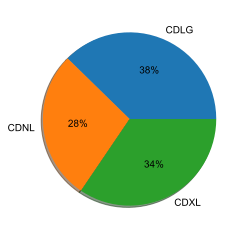

In [53]:
#1-数值
x1=x['销售额']
labels=x['门店编号']
#2-建立坐标系并绘图
plt.subplot(1,1,1)
plt.pie(x1,labels=labels,autopct='%.0f%%',shadow=True)

4、哪些时段是超市的客流高峰期？---指标：客流量；思路：按时段分组对客流量进行求和并排序，客流量是对订单的不同计数

In [72]:
#创建时段指标---自定义一个提取小时的函数，并应用于每一个值
from datetime import datetime
data_notnull['时段']=data_notnull['成交时间'].map(lambda x:int(x.strftime('%H')))
#del data_notnull ['成交时间字符串'] ---用来删除列表的数据，删除之后不可再用
data_notnull.head(5)

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID,销售额,时段
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759,8.27544,9
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759,4.00000,9
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759,4.51260,9
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759,5.72320,9
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759,10.71466,9


In [77]:
#创建时段指标方法二---可以把成交时间转换成字符串，再用字符串截取函数截取小时
data_notnull['成交时间字符串']=data_notnull['成交时间'].map(lambda x:str(x))  #对每一列都操作时就需要用到map函数
data_notnull['小时']=data_notnull['成交时间字符串'].map(lambda x: x[11:13])  #对每一列都操作时就需要用到map函数
data_notnull.head(5)

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID,销售额,时段,成交时间字符串,小时
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759,8.27544,9,2017-01-03 09:56:00,09
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759,4.00000,9,2017-01-03 09:56:00,09
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759,4.51260,9,2017-01-03 09:56:00,09
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759,5.72320,9,2017-01-03 09:56:00,09
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759,10.71466,9,2017-01-03 09:56:00,09


In [78]:
#对小时和订单进行去重---同一小时内有多个订单，这些订单来自同一个人，算作一个人
data_num=data_notnull[['小时','订单ID']].drop_duplicates()
data_num.head(5)

,小时,订单ID
0,09,20170103CDLG000210052759
10,09,20170103CDLG000210052760
15,09,20170103CDLG000210052761
22,10,20170103CDLG000210052762
23,10,20170103CDLG000210052763


In [80]:
#对去重后的数据进行分组统计
data_num.groupby(['小时'])['订单ID'].count()

小时
06     10
07     37
08    106
09    156
10    143
11     63
13     30
14     36
15     17
16     50
17     73
18     71
19     71
20     39
21     16
Name: 订单ID, dtype: int64